In [17]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, exp
import numpy.fft as fft
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

%matplotlib ipympl

<img src="Figurer/NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Diskrét Fouriertransformasjon del 2

* **Emne AIS2201 - Signalbehandling**
* **Uke 38, 2024**
* **Underviser: Kai Erik Hoff**


# Tema

* Repetisjon Diskret Fouriertransformasjon og FFT
* Frekvensanalyse med FFT
* Invers Diskret Fouriertransformasjon
    * IFFT
* Signaloperasjoner i frekvensdomenet

## Repetisjon: Diskret Fouriertransformasjon (DFT)

1. Samle opp et signal over et sampleintervall $N$. Lengden $N$ til sampleintervallet er kjent som ***vinduslengden***
2. Bruk frekvensforskyvning til å plukke ut sinussekvensene som fullfører 0, 1, 2, 3, 4, 5 osv.. fulle svingninger i løpet av et sampleintervall $N$.

<img src="Figurer/06_DFT/Fig2_DFT_IO.png" style="width: 100%; margin-left: 0px" />

## Diskret Fouriertransformasjon (DFT)

* Formel:
$$X[m] = \sum_{n=0}^{N-1}x[n]\cdot e^{-j\cdot 2\pi \frac{m\cdot n}{N}} $$ 
Der $m$ er en arbitrær heltallsvariabel
    
<br>

* Ligner på fourierrekke-dekomposisjon.
* Dekomponerer et digitalt signal basert på et sample-intervall $N$.
* Gir en sekvens med komplekse amplituder for frekvensene
$$\hat{\omega}_m = \frac{2\pi \cdot m}{N}$$
* Sekvensen $X[m]$ vil være periodisk over $N$ sampler.

## Repetisjon: DFT-sekvensen

* Vi regner kun ut for heltallsverdier av $m \in \{0, 1, \ldots, N-1\}$.
    * Negative frekvenskomponenter representeres med aliasene i frekvensintervallet $\pi<\hat{\omega}_m < 2\pi$.
    
<img src="Figurer/06_DFT/Fig4_DFT_1.png" style="width: 100%" />

## Repetsisjon: Nøkkelkonseptet oppløsningsbåndbredde
* Avstanden i frekvensplanet mellom hver utregnet frekvenskomponent $\Delta\hat{\omega}$.
* Omvendt proporsjonal med vinduslengden $N$, altså antallet signalsampler som brukes til å regne ut DFT.
$$\Delta \hat{\omega} = \frac{2\pi}{N}$$
* For signal samplet med samplingsfrekvens $f_s$, vil oppløsningsbåndbredden være:
$$\Delta f = \Delta \hat{\omega} \cdot \frac{f_s}{2\pi} = \frac{f_s}{N}$$

## Repetisjon: Indeksverdi $m$

* DFT gir en endelig rekke "frekvenssampler", altså sampler av signalets frekvensrepresentasjon.
* Hver frekvenssample har en indeksverdi $m$.
* Vi kan regne ut frekvensen til den aktuelle komponenten ved å ta utgangspunkt i indeksverdien $m$.
* For en $N$-punkts DFT:

$$\hat{\omega}_m = m\cdot \Delta \hat{\omega} = m\cdot \frac{2\pi}{N}$$


$$f_m = m\cdot \Delta f = m\cdot \frac{f_s}{N}$$

## Repetisjon: DFT Egenskaper

* Periodisk over $N$ sampler.
$$X[m] = X[m+l\cdot N], \ \ \ l \in \mathbb{Z}$$
* Komplekskonjugert symmetri.
$$X[m] = X[-m]^* = X[N-m]^*$$

* DC-komponent:
    - Tilsvarer $X[0]$.
    - Fase enten $0$ eller $\pi$.
* Midtpunkt $\left( m=\frac{N}{2} \right)$
    - Tilsvarer nøyaktig 2 sampler per periode/svingning av sinuskomponenten.
    - Fase lik $0$ eller $\pi$ (ingen imaginær del).

## Repetisjon: Tolkning av DFT (Amplitude)
* Relasjon mellom $|X[m]|$ og amplitude på sinuskomponent

<img src="Figurer/06_DFT/Fig5_DFT_2.png" style="width: 80%; margin-left: 100px" />

## Repetisjon: Tolkning av DFT (Fase)
* Relasjon mellom $\angle X[m]$ og fase på sinuskomponent

<img src="Figurer/06_DFT/Fig6_DFT_3.png" width="80%" />

# Repetisjon: Fast Fourier Transform (FFT)

* Effektiv algoritme for utregning av DFT
    - I Python finnes ingen "vanlig" DFT funksjon. Resultatet er nøyaktig det samme med FFT.
    - FFT-funksjonen i `numpy`: [`numpy.fft.fft()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#numpy.fft.fft)
    
    
```python
import numpy as np
x_n = np.array([1, 2, 3, 4, 0, 4, 2 , 5, 3, 1, 4, 2])
X_m = np.fft.fft(x_n)
X_m
```
Gir: 

`array([31.        +0.00000000e+00j, -3.33012702+9.64101615e-01j,
       -0.5       -2.59807621e+00j, -5.        +4.00000000e+00j,
       -3.5       +8.66025404e-01j,  5.33012702-5.96410162e+00j,
       -5.        +2.22044605e-16j,  5.33012702+5.96410162e+00j,
       -3.5       -8.66025404e-01j, -5.        -4.00000000e+00j,
       -0.5       +2.59807621e+00j, -3.33012702-9.64101615e-01j])`

## Kodeeksempel 1
* Bruk `fft()` til å regne ut frekvensinnholdet til signalet `x_n` fra datafilen, og vis et tosidig frekvensspekter med *normalisert vinkelfrekvens* langs x-aksen.
    * P.S. funksjonen `numpy.fft.fftshift()` kommer godt med her.

Text(0.5, 0, 'Frekvens f (Hz)')

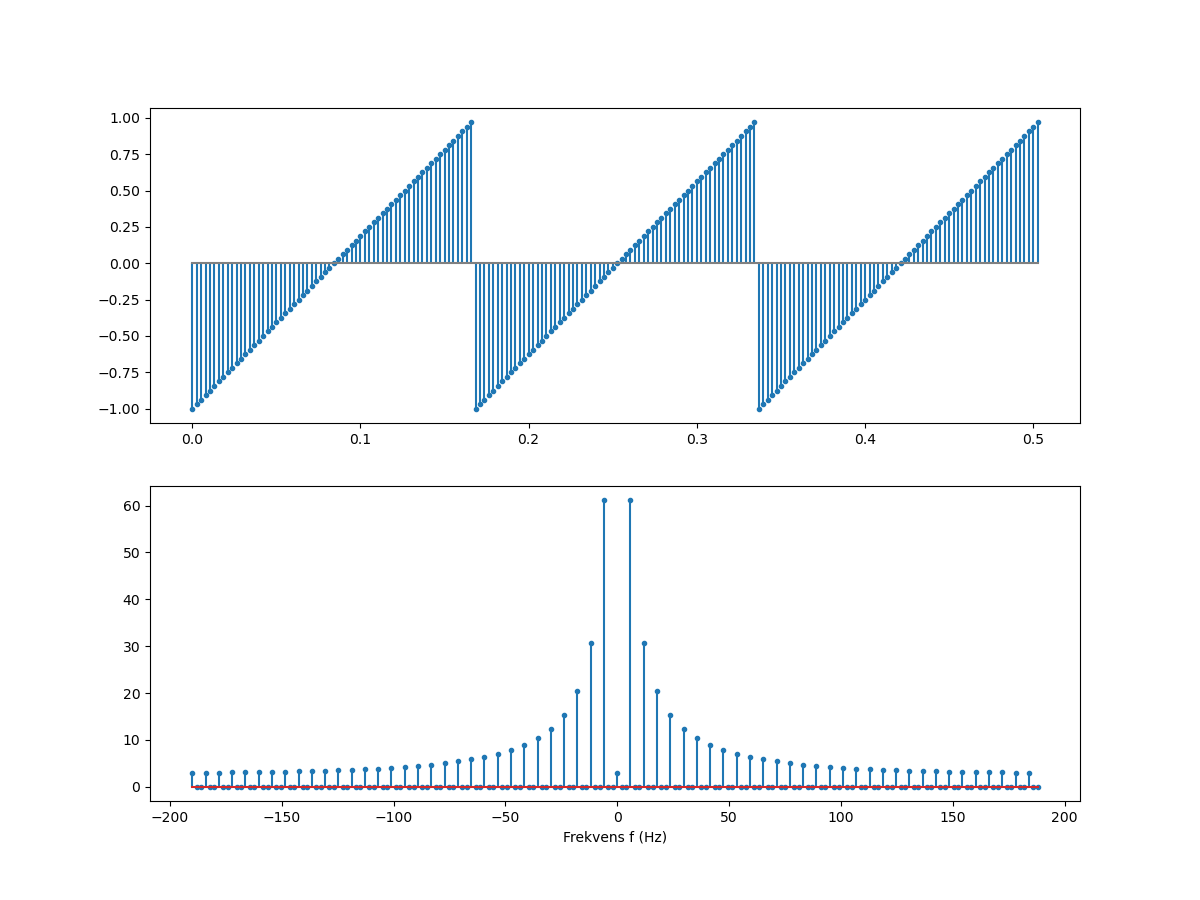

In [8]:
from scipy.io import loadmat
%matplotlib ipympl
data = loadmat('Datafiler/06_DFT/06_DFT_data.mat', squeeze_me=True)

x_n = data['x2_n']
Fs = data['f_s']

N = len(x_n)
t_n = np.arange(N)/Fs

X_m = np.fft.fft(x_n)
X_m_shifted = np.fft.fftshift(X_m)

m = np.arange(-N//2, N//2)
f_m = Fs/N*m

plt.close(1);plt.figure(1, figsize=(12,9))
plt.subplot(2,1,1)
plt.stem(t_n, x_n, markerfmt='.', basefmt='grey')

plt.subplot(2,1,2)

plt.stem(f_m, abs(X_m_shifted), markerfmt='.')
plt.xlabel("Frekvens f (Hz)")

# Invers DFT (IDFT)

* Transformasjon av et samplet frekvensspekter $X[m]$ tilbake til tidsdomenet $x[n]$.

* Formel:
$$x[n] = \frac{1}{N}\sum_{m=0}^{N-1}X[m]\cdot e^{j\cdot 2\pi \frac{m\cdot n}{N}} $$
Der $n$ er samplenummer 
    
    
* Systematisk summering av alle komplekse eksponentialer som utgjør signalet $x[n]$
* Legg merke til at divisjon med $N$ utføres i overgang fra frekvensdomenet til tidsdomenet (IDFT), og ikke ved utregning av DFT.

## Kodeeksempel 2:

Bruk IFFT til å generere $N=128$ sampler av signalet $x[n] = \sin\left(\frac{\pi}{32} \cdot n \right) $

<StemContainer object of 3 artists>

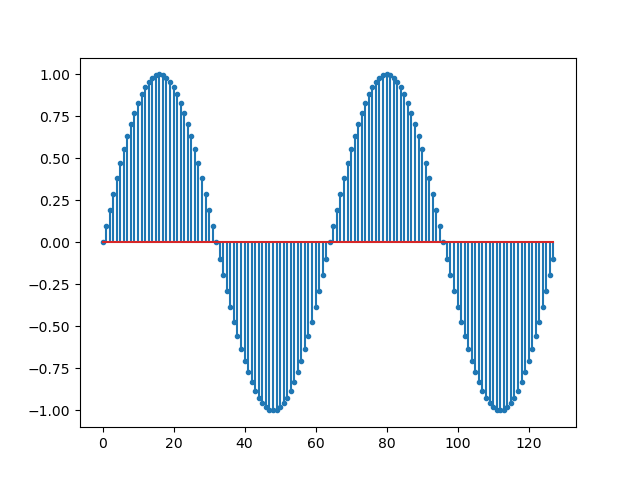

In [27]:
N = 128
n = np.arange(N)

Xm = np.zeros(N) + 0j

# Finn frekvens-indeks "m" der x[n] vil representeres
freq_rad = pi/32
m_freq = freq_rad/(2*pi)*N
m_freq = int(m_freq)

Xm[m_freq] = -1j*N/2
Xm[N-m_freq] = 1j*N/2

xn = np.fft.ifft(Xm)
xn = np.real(xn)
plt.close(2); plt.figure(2)
plt.stem(xn, markerfmt='.')

# Signaloperasjoner i frekvensplanet

* Kombinasjonen av DFT og IDFT gjør at signal kan prosesseres i frekvensdomenet.

<img src="Figurer/06_DFT/Fig11_FreqProcessing.png" width="80%" />

# Skalering
|$\text{Frekvensdomene}$|$\text{Tidsdomene}$|
|---|---|
|$Y[m] = X[m]\cdot \gamma$ | $y[n] = x[n]\cdot \gamma$|

*PS: for reelle signal kan vi også bruke [rfft](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html) / [irfft](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft.html#numpy.fft.irfft).*

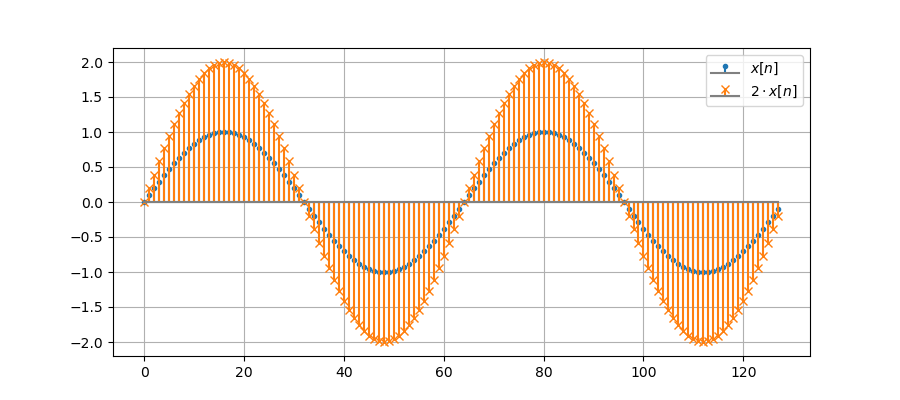

In [33]:
Xm = np.fft.rfft(xn) # xn fra forrige eksempel

scale_factor = 2
Ym = scale_factor*Xm

yn = np.fft.irfft(Ym) # Real IFFT


# Lag en figur med stolpediagram av både x[n] og y[n]
plt.close(3); plt.figure(3, figsize=(9, 4))
plt.stem(n, xn, basefmt='grey', label='$x[n]$', markerfmt='.')
plt.stem(n, yn, basefmt='grey', markerfmt='xC1', linefmt='C1', label='$2 \cdot x[n]$')
plt.legend()
plt.grid(True)

In [32]:
x_test = [2, 0, 1, 3]
X_DFT = np.fft.rfft(x_test)






np.fft.irfft(X_DFT)

array([2., 0., 1., 3.])

5.10702591327572e-15


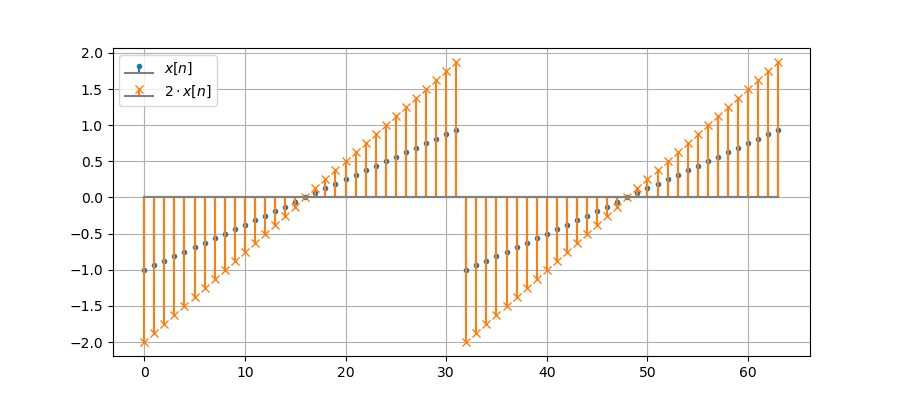

In [3]:
# Lag 64 sampler av en firkantpuls der perioden er 32 sampler
N = 64
n = np.arange(0, N)
x_n = sig.sawtooth(2*pi*n/32) 
y_n = x_n*2
# Ta DFT av firkantpulsen for å finne X[m]
X_m = np.fft.fft(x_n)
Y_m = X_m * 2

y_n = np.fft.ifft(Y_m)
print(sum(abs(np.imag(y_n))))
y_n = np.real(y_n)
# Lag en figur med stolpediagram av både x[n] og y[n]
plt.close(2); plt.figure(2, figsize=(9, 4))
plt.stem(n, x_n, basefmt='grey', label='$x[n]$', markerfmt='.')
plt.stem(n, y_n, basefmt='grey', markerfmt='xC1', linefmt='C1', label='$2 \cdot x[n]$')
plt.legend()
plt.grid(True)

* Muligheten til å skalere hele signalet er kanskje ikke så veldig interessant, men legg merke til at vi også kan skalere de forskjellige frekvenskomponentene ulikt. Dette vil tilsvare en form for filtrering.

# Justering av konstantledd
|$\text{Frekvensdomene}$|$\text{Tidsdomene}$|
|---|---|
|$Y[0] = X[0] + N \cdot \alpha$ | $y[n] = \alpha + x[n]$|


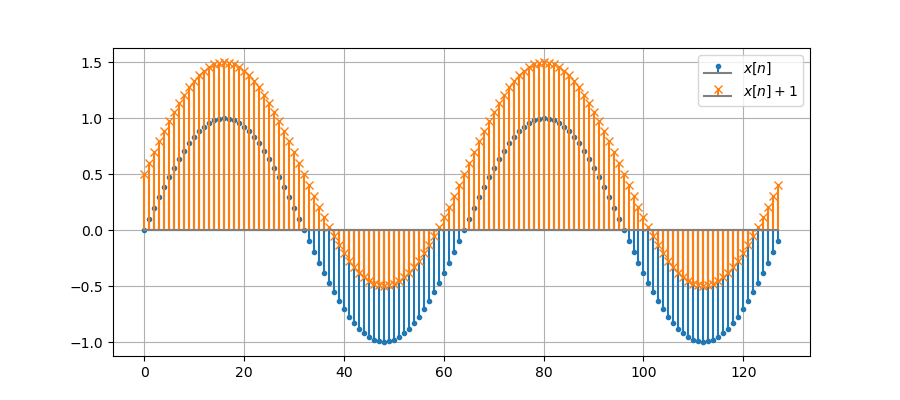

In [35]:
Xm = np.fft.rfft(xn)

Ym = Xm.copy()
Ym[0] += N*0.5

# Ym[0] = 0 vil "filtrere ut" konstantleddet

yn = np.fft.irfft(Ym)

# Lag en figur med stolpediagram av både x[n] og y[n]
plt.close(4); plt.figure(4, figsize=(9, 4))
plt.stem(n, xn, basefmt='grey', label='$x[n]$', markerfmt=".")
plt.stem(n, yn, basefmt='grey', markerfmt='xC1', linefmt='C1', label='$x[n]+1$')
plt.legend()
plt.grid(True)

/opt/conda/lib/python3.10/site-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/conda/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


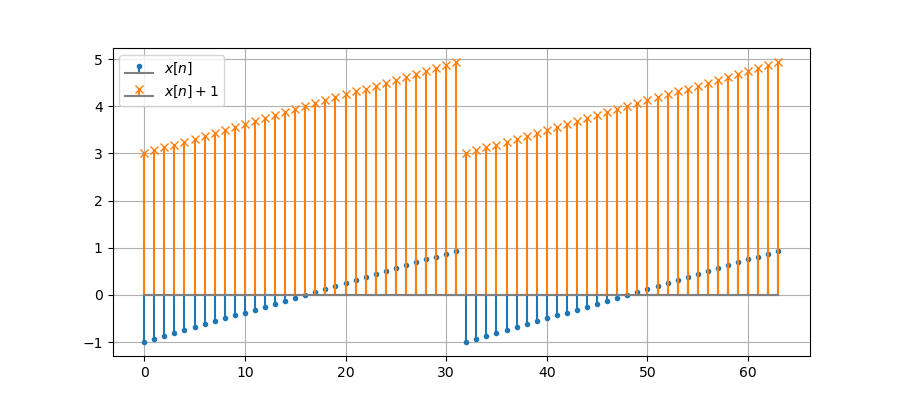

In [4]:
# Lag 64 sampler av en firkantpuls der perioden er 32 sampler
N = 64
n = np.arange(0, N)
x_n = sig.sawtooth(2*pi*n/32) 

# Ta DFT av sagtann for å finne X[m]
X_m = np.fft.fft(x_n)
Y_m = X_m.copy()
Y_m[0] += 4*len(x_n)
y_n = np.fft.ifft(Y_m)

# Lag en figur med stolpediagram av både x[n] og y[n]
plt.close(3); plt.figure(3, figsize=(9, 4))
plt.stem(n, x_n, basefmt='grey', label='$x[n]$', markerfmt=".")
plt.stem(n, y_n, basefmt='grey', markerfmt='xC1', linefmt='C1', label='$x[n]+1$')
plt.legend()
plt.grid(True)

# Tidsforskyving
|$\text{Frekvensdomene}$|$\text{Tidsdomene}$|
|---|---|
|$Y[m] = X[m] \cdot e^{j\cdot 2\pi \cdot \frac{D}{N}\cdot m}$ | $y[n] = x[n+D]$|

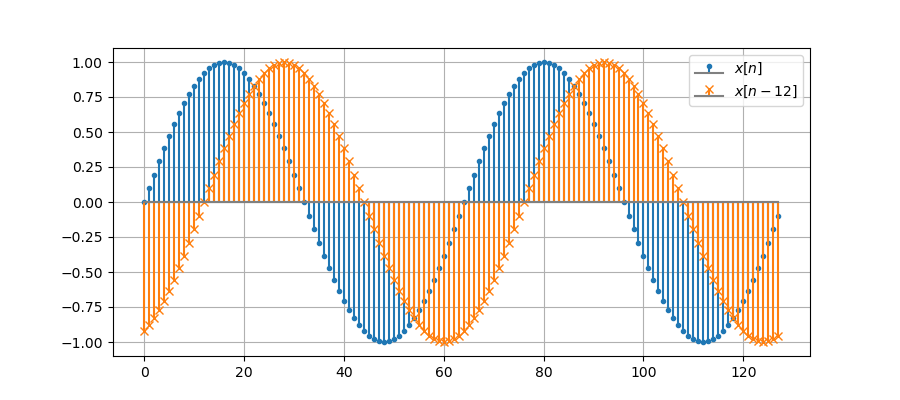

In [37]:
Xm = np.fft.rfft(xn)
m = np.arange(len(Xm))

Ym = Xm*np.exp(2j*pi*-12*m/N)

yn = np.fft.irfft(Ym)


# Lag en figur med stolpediagram av både x[n] og y[n]
plt.close(5); plt.figure(5, figsize=(9, 4))
plt.stem(n, xn, basefmt='grey', label='$x[n]$', markerfmt= '.')
plt.stem(n, yn, basefmt='grey', markerfmt='xC1', linefmt='C1', label='$x[n-12]$')
plt.legend()
plt.grid(True)

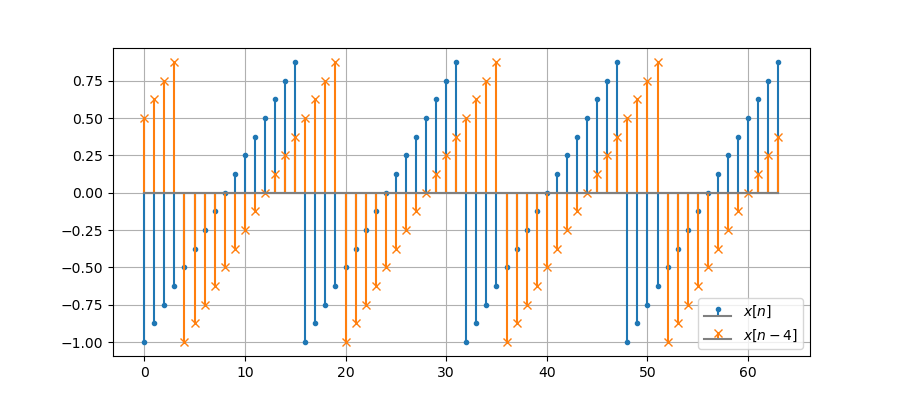

In [9]:
# Lag 64 sampler av en firkantpuls der perioden er 32 sampler
N = 64
n = np.arange(0, N)
x_n = sig.sawtooth(2*pi*n/16)

D = -4

# Ta DFT av firkantpulsen for å finne X[m]
X_m = np.fft.fft(x_n)
Y_m = X_m*np.exp(2j*pi*np.arange(N)*D/N)
y_n = np.fft.ifft(Y_m)

# Lag en figur med stolpediagram av både x[n] og y[n]
plt.close(5); plt.figure(5, figsize=(9, 4))
plt.stem(n, x_n, basefmt='grey', label='$x[n]$', markerfmt= '.')
plt.stem(n, y_n, basefmt='grey', markerfmt='xC1', linefmt='C1', label='$x[n-4]$')
plt.legend()
plt.grid(True)

* Legg merke til at vi får en "sirkulær" tidsforskyvning av $x[n]$ der de 4 bakerste samplene flyttes til starten.

# Filtrering

* Utenom digitale filtre, er det også fullt mulig å filtrere et signal med bruk av DFT/IDFT.
$$Y[m] = X[m]\cdot H[m]$$
    * Der *frevkensresponen* $H[m]$ kan være en slags binær "maske":
$$
H[m] = 
\begin{cases}
1,& \ \ \ \ \ \text{frekvenskomponenten med frekvens } \hat{\omega} > \hat{\omega}_m \text{ skal beholdes.}\\
0,& \ \ \ \ \ \text{frekvenskomponenten med frekvens } \hat{\omega} < \hat{\omega}_m \text{ skal fjernes.}
\end{cases}
$$

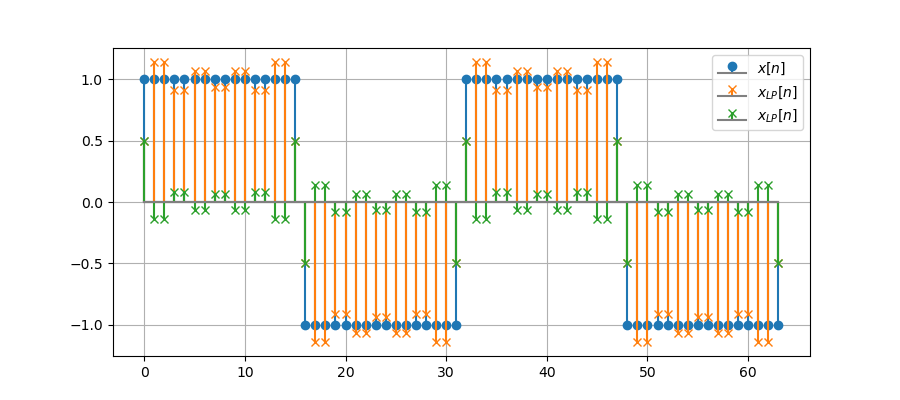

In [46]:
import scipy.signal as sig
# Lag 64 sampler av en firkantpuls der perioden er 32 sampler

N = 64
n = np.arange(0, N)
x_n = sig.square(2*pi*n/32)

# Ta DFT av firkantpulsen for å finne X[m]
X_m = np.fft.rfft(x_n)
m = np.arange(len(X_m))

m_cutoff = 16 # Kantfrekvens i indeks-form

H_lp = (m < m_cutoff)
H_hp = (m >= m_cutoff)

X_lp = X_m * H_lp
y_n = np.fft.irfft(X_lp)

X_hp = X_m * H_hp
y2_n = np.fft.irfft(X_hp)

# Lag en figur med stolpediagram av både x[n] og y[n]
plt.close(6); plt.figure(6, figsize=(9, 4))
plt.stem(n, x_n, basefmt='grey', label='$x[n]$')
plt.stem(n, y_n, basefmt='grey', markerfmt='xC1', linefmt='C1', label='$x_{LP}[n]$')
plt.stem(n, y2_n, basefmt='grey', markerfmt='xC2', linefmt='C2', label='$x_{LP}[n]$')
plt.legend()
plt.grid(True)

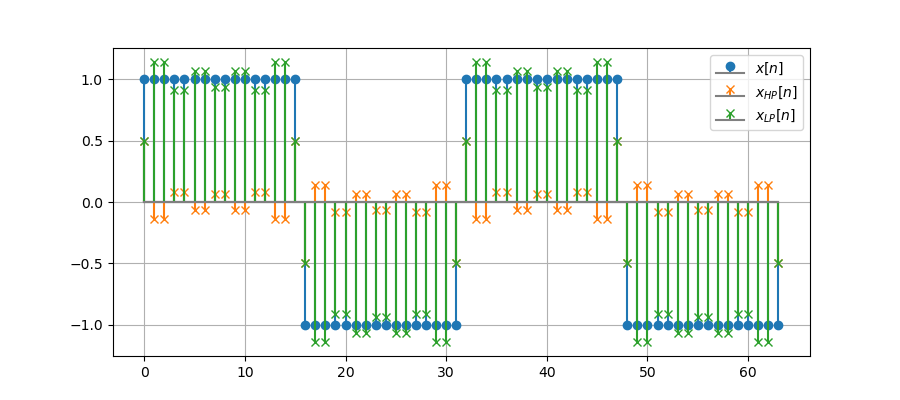

In [6]:
import scipy.signal as sig
# Lag 64 sampler av en firkantpuls der perioden er 32 sampler

n = np.arange(0, N)
x_n = sig.square(2*pi*n/32)

# Ta DFT av firkantpulsen for å finne X[m]
X_m = np.fft.fft(x_n)
m = n.copy()

H_m = ((m>N/4) * (m < 3*N/4))*1.0
Y_m = X_m*H_m
Y2_m = X_m*(1-H_m)
# Fullfør resten...

plt.close(4); plt.figure(4, figsize=(9, 4))
#plt.stem(H_m)

y_n = np.real(np.fft.ifft(Y_m))
y2_n = np.real(np.fft.ifft(Y2_m))

# Lag en figur med stolpediagram av både x[n] og y[n]
plt.close(4); plt.figure(4, figsize=(9, 4))
plt.stem(n, x_n, basefmt='grey', label='$x[n]$')
plt.stem(n, y_n, basefmt='grey', markerfmt='xC1', linefmt='C1', label='$x_{HP}[n]$')
plt.stem(n, y2_n, basefmt='grey', markerfmt='xC2', linefmt='C2', label='$x_{LP}[n]$')
plt.legend()
plt.grid(True)

## Kodeeksempel: Båndsplitting av musikk

* Lydfilen `RockDrums-48-mono-11secs.wav` er samplet med en samplingsfrekvens på $44100$ sampler per sekund. Del opp lydfilen i én del med frekvenser $0 \leq f < 2000$, og en med frekvensene $f > 2000$.

In [47]:
from scipy.io import wavfile
fs, data = wavfile.read("Datafiler/06_DFT/RockDrums-48-mono-11secs.wav")
x_n = data/0x8000
N = len(x_n)
m = np.arange(N)

X_m = np.fft.fft(x_n)

f_cutoff = 2000 # Hz
m_cutoff = N//(fs/f_cutoff) # Indeks for frekvenssample på avskjæringsfrekvensen

H1_m = (m<m_cutoff)+(m>N-m_cutoff)
H2_m = (m>=m_cutoff)*(m<=N-m_cutoff)

Y_LP = X_m*H1_m # Lavpassfiltrert signal
Y_HP = X_m*H2_m # Høypassfiltrert signal

# Sett sammen lyd med ulik skalering av lavpassfiltret og høypassfiltrert bånd

y_LP = np.real(np.fft.ifft(Y_LP))
y_HP = np.real(np.fft.ifft(Y_HP))

**Spill av audio:**

In [50]:
from IPython.display import Audio
Audio(y_LP, rate=fs)

* Til ettertanke:
    * Hva skjer når vi utfører frekvensanalyse på et signal som *ikke* er periodisk over vinduslengden *N* sampler?